One of the techniques to decide which color each pixle is blong to, is to test if this pixle fall inside predefind color limits.
The following code lines will show one way for retriving this limits.
The main steps are:
1. Sampeling color groups by simply croping intereted area 
2. Estimating mean and std of pixels for each color  group
3. Fine tune for upper and lower bounds 

import the necessary packages



In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import clear_output
from hough_circles_utils import stuck_image_pixels,showimage

Configs

In [2]:
images_dir_path = "data/orange/"
image = cv2.imread("data/mnm_image.png")[:,:,:]
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


color = 'orange'

Read all sampled crops and join into one array of pixels

In [3]:
joined_images = stuck_image_pixels(images_dir_path = images_dir_path)

Estimate mean ans std per chanel

In [4]:
average_per_chanel = joined_images.mean(axis=0) 
std_per_chanel = joined_images.std(axis=0)

Run in loop and plot limits effectnes with respect to different confidence interval

In [7]:
import time

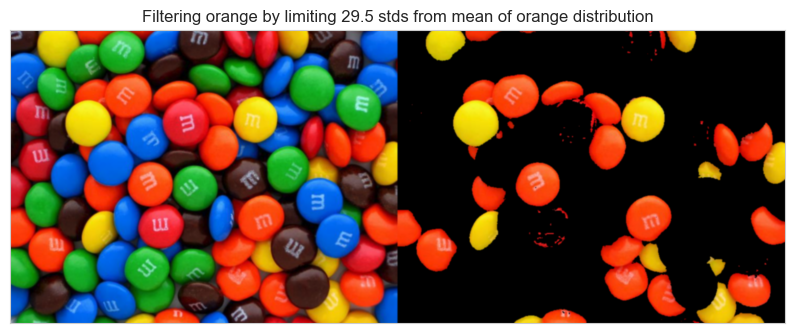

In [13]:

for i in np.arange (start = 0.5 , stop = 30, step =1):
    # Get lower and upper bound by moving +- n std from estimated mean 
    lower_bound = tuple(np.maximum(average_per_chanel - i * std_per_chanel,0).astype(int).tolist() )
    upper_bound = tuple(np.minimum(average_per_chanel + i * std_per_chanel,255).astype(int).tolist())


    # Using inRange method, to create a mask
    mask = cv2.inRange(image_hsv, lower_bound, upper_bound)
    
    # Apply mask 
    r =  cv2.bitwise_or(image, image, mask=mask)
    stacked_image =  np.hstack([image, r])

    # Show origin image asid masked 
    showimage(stacked_image,color =color , std = i)
    clear_output(wait=True)
    if i < 0.6:
        time.sleep(5)
    